# 代码中定义了固定的PAR变量列表fixed_par_vars，包含了5个不同时间点的PAR值:
# - GMT_0000_PAR: 格林威治时间0点的光合有效辐射
# - GMT_0300_PAR: 格林威治时间3点的光合有效辐射  
# - GMT_0600_PAR: 格林威治时间6点的光合有效辐射
# - GMT_0900_PAR: 格林威治时间9点的光合有效辐射
# - GMT_2100_PAR: 格林威治时间21点的光合有效辐射
# 这些变量用于记录一天中不同时间点的光合有效辐射强度数据


成功读取lanshanzui的CSV文件
成功读取tuoshan的CSV文件
成功读取乌龟山南的CSV文件
成功读取五里湖心的CSV文件
成功读取胥湖心的CSV文件
成功读取锡东水厂的CSV文件
正在绘制: GMT_0000_PAR随时间的变化


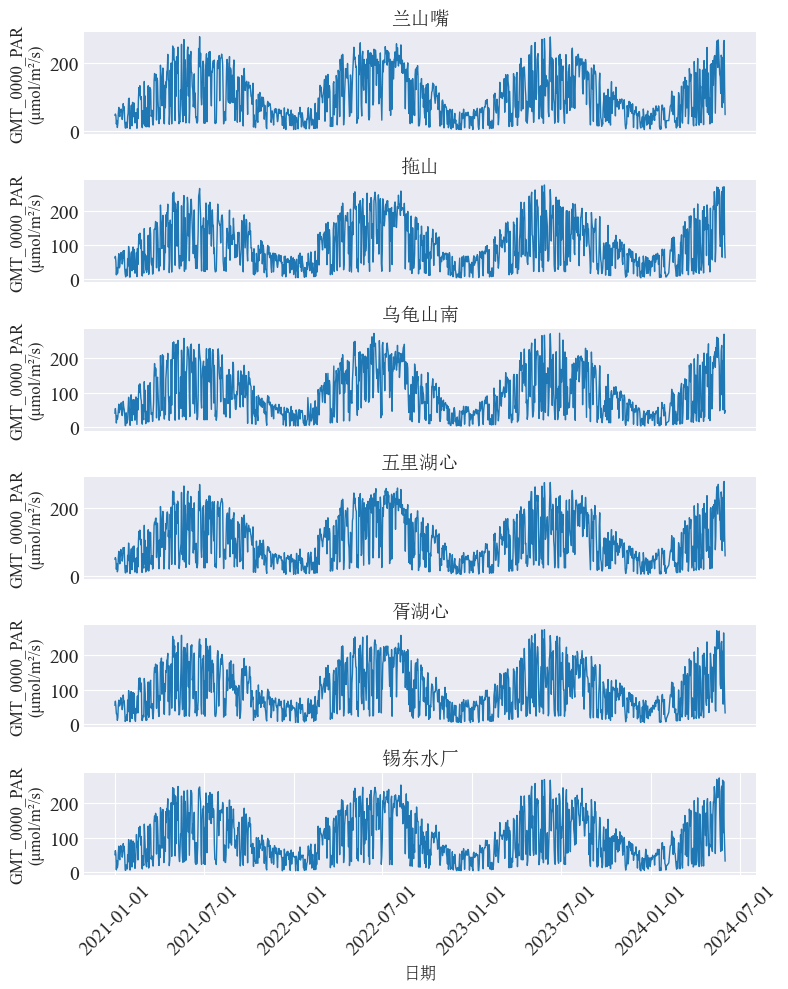

正在绘制: GMT_0300_PAR随时间的变化


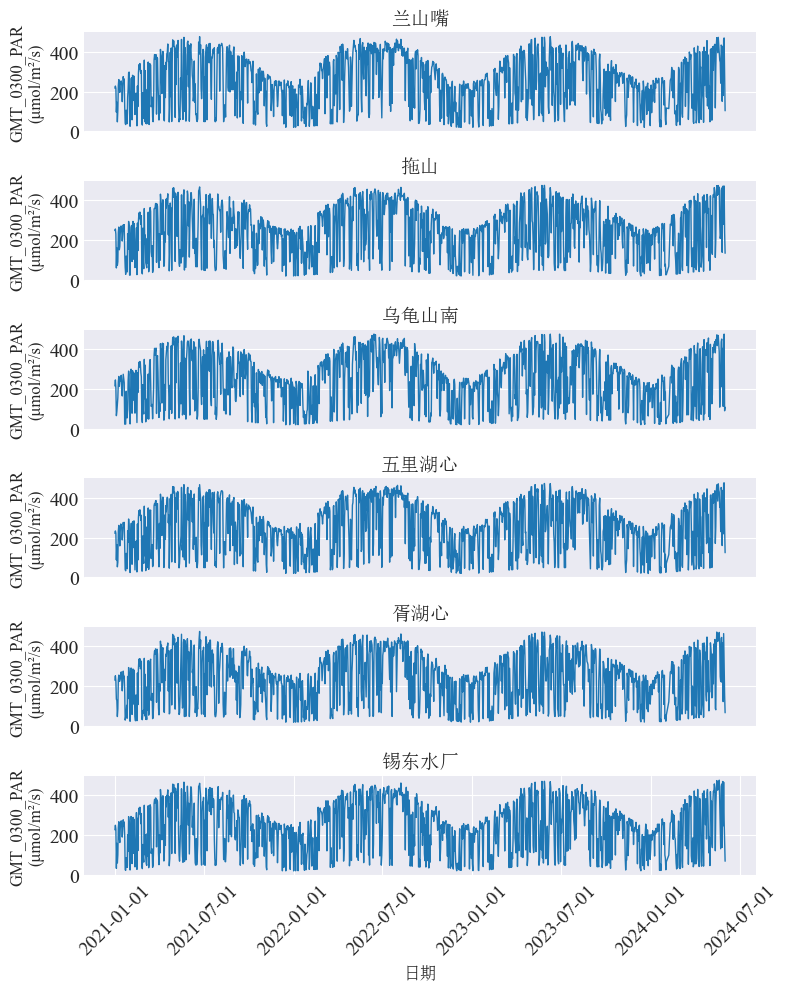

正在绘制: GMT_0600_PAR随时间的变化


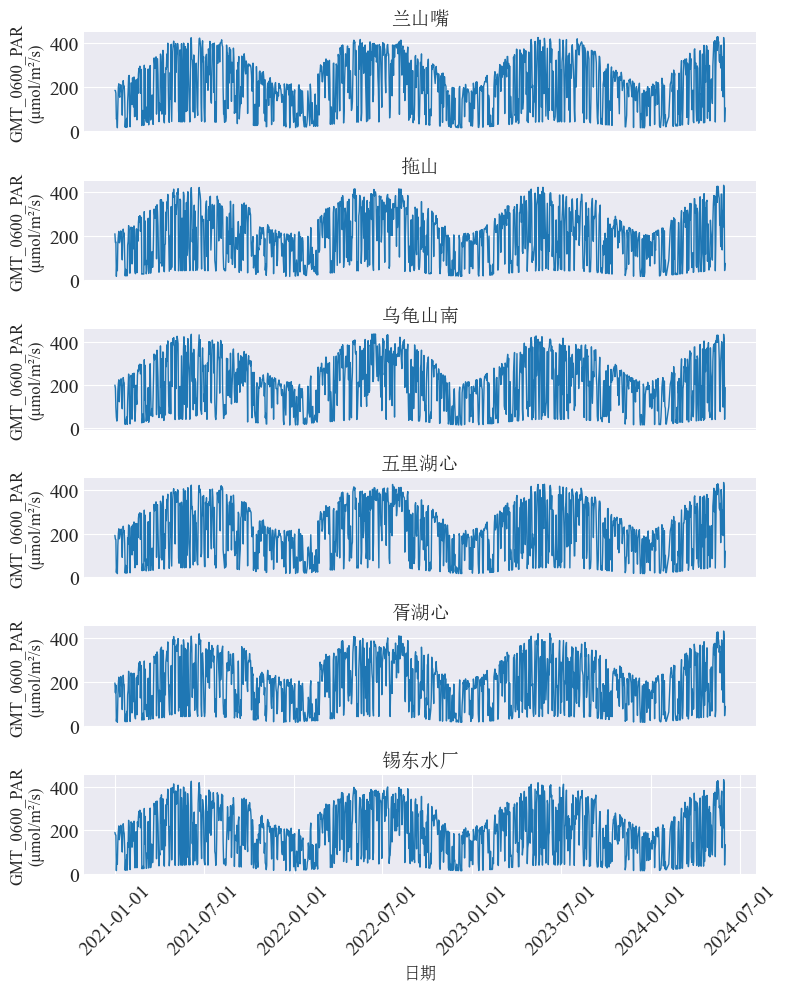

正在绘制: GMT_0900_PAR随时间的变化


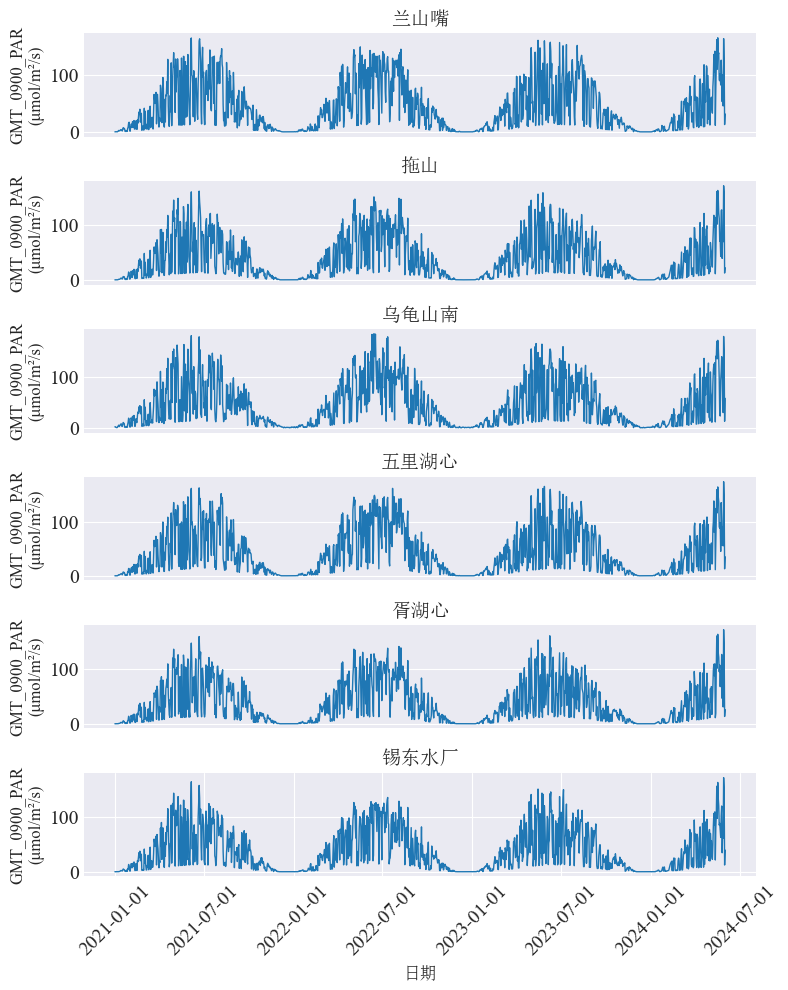

正在绘制: GMT_1200_PAR随时间的变化


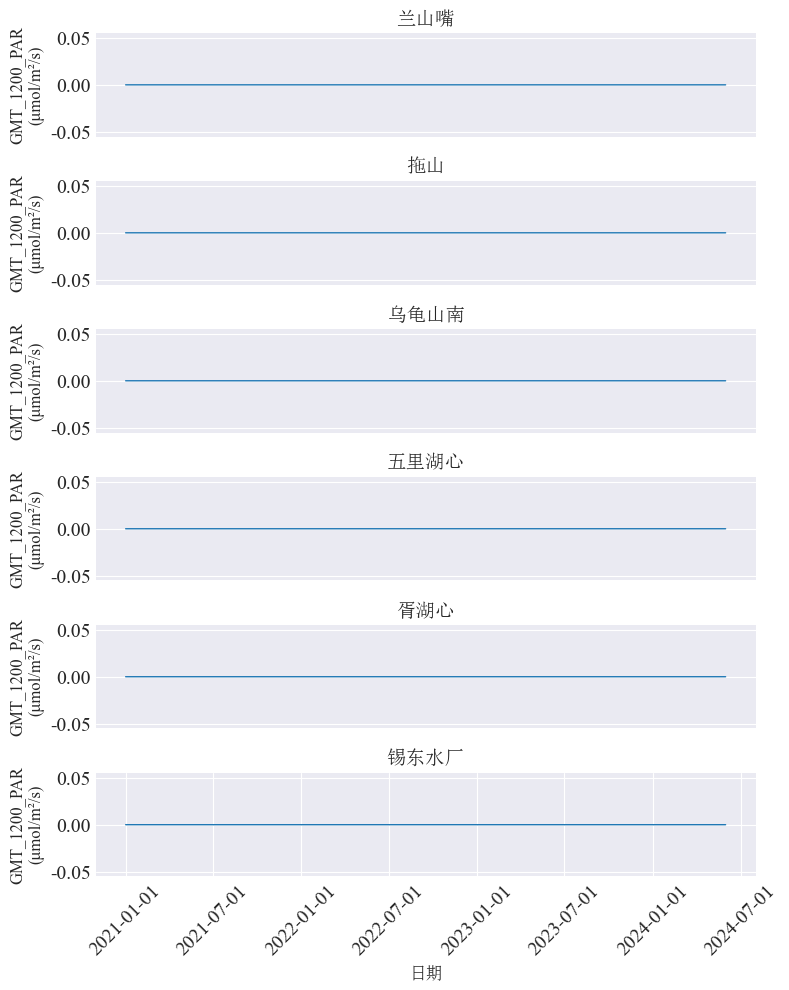

正在绘制: GMT_1500_PAR随时间的变化


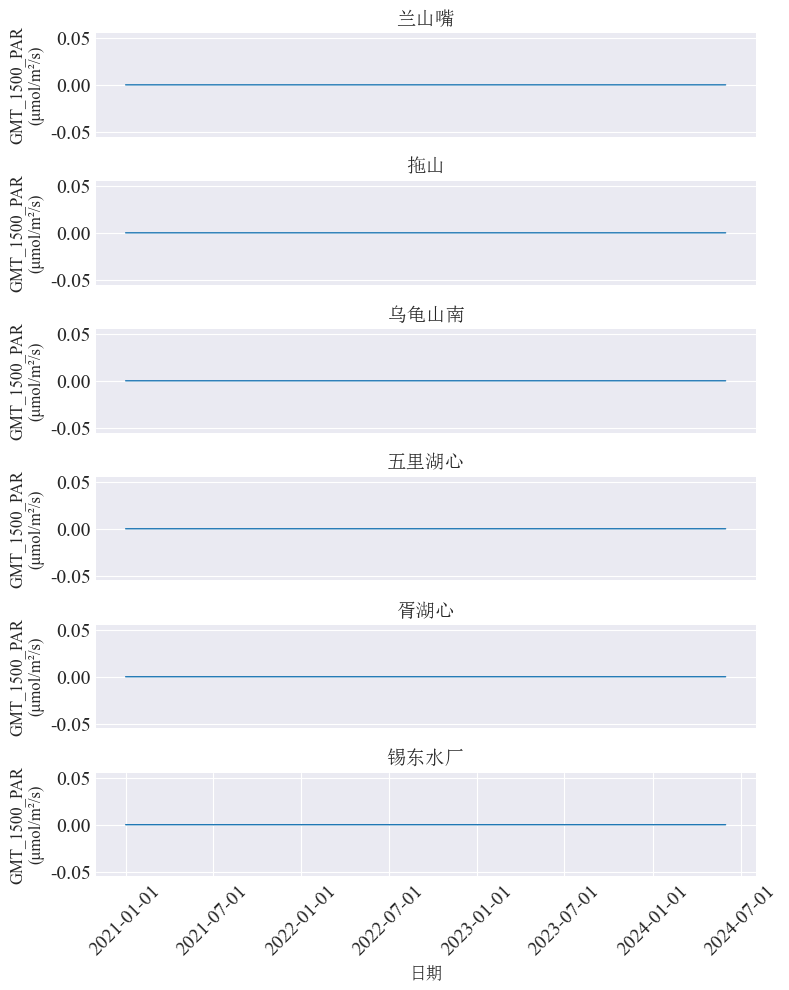

正在绘制: GMT_1800_PAR随时间的变化


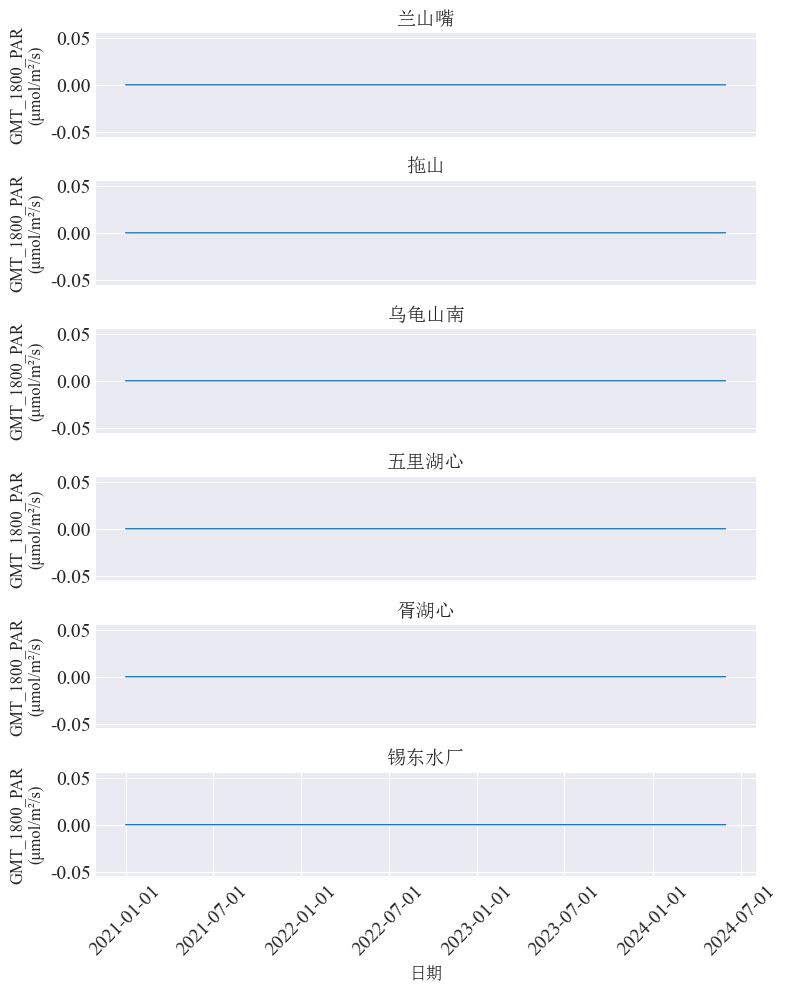

正在绘制: GMT_2100_PAR随时间的变化


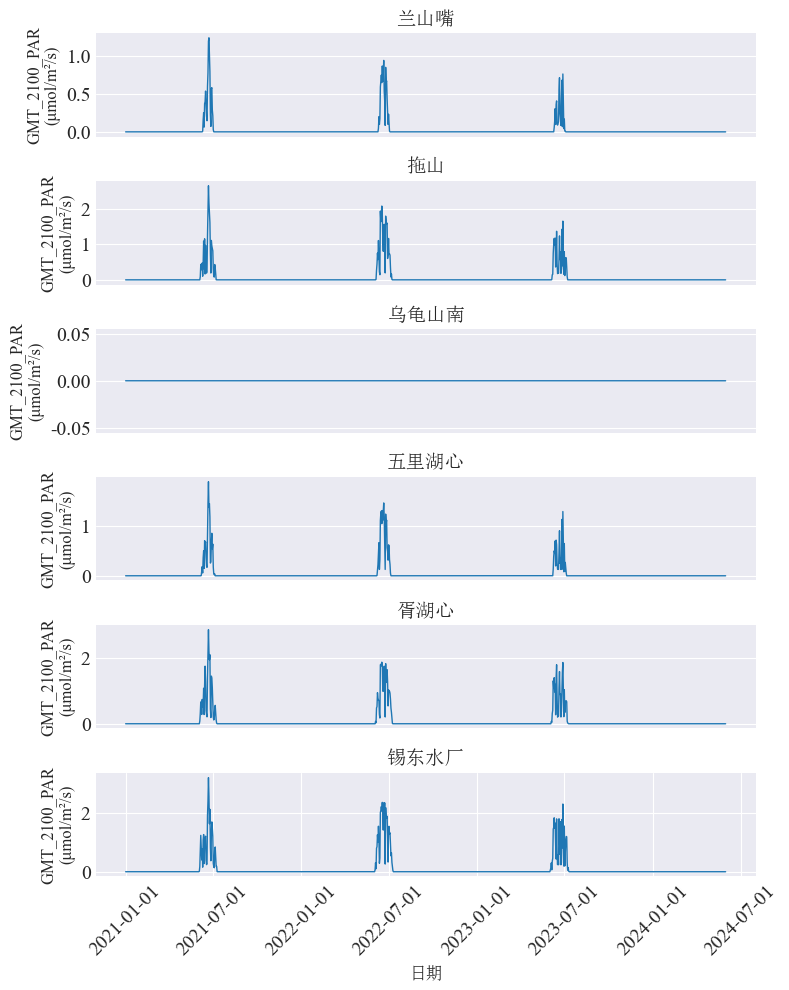

正在绘制: DAPAR随时间的变化


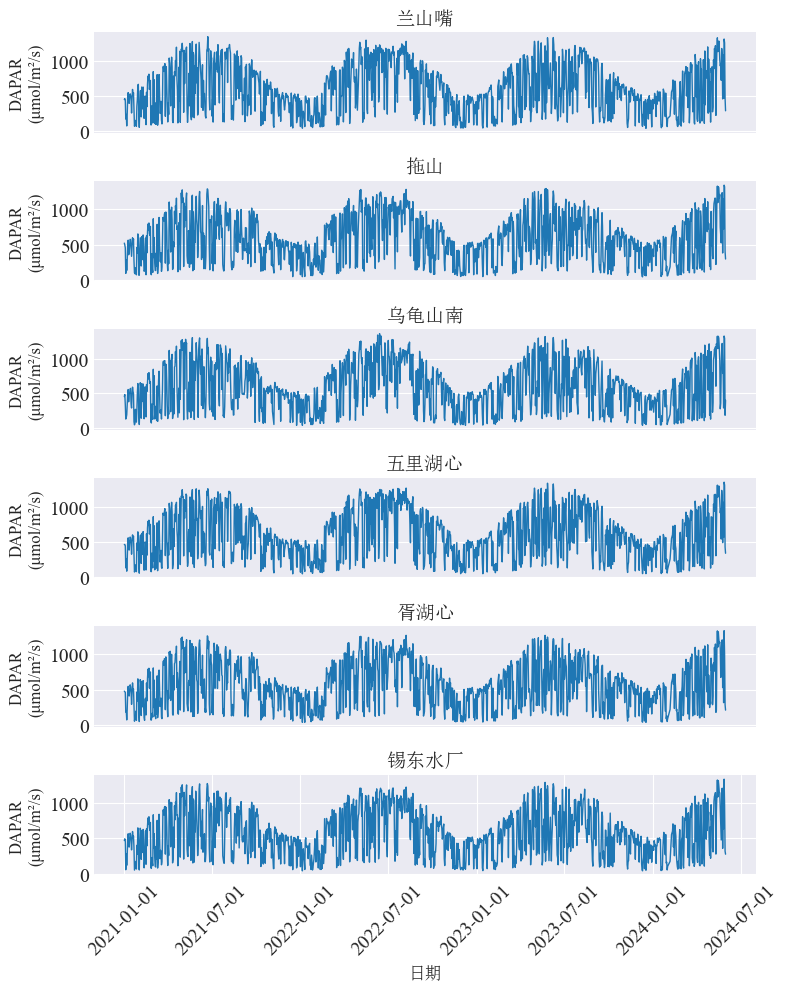

正在绘制: PDVI随时间的变化


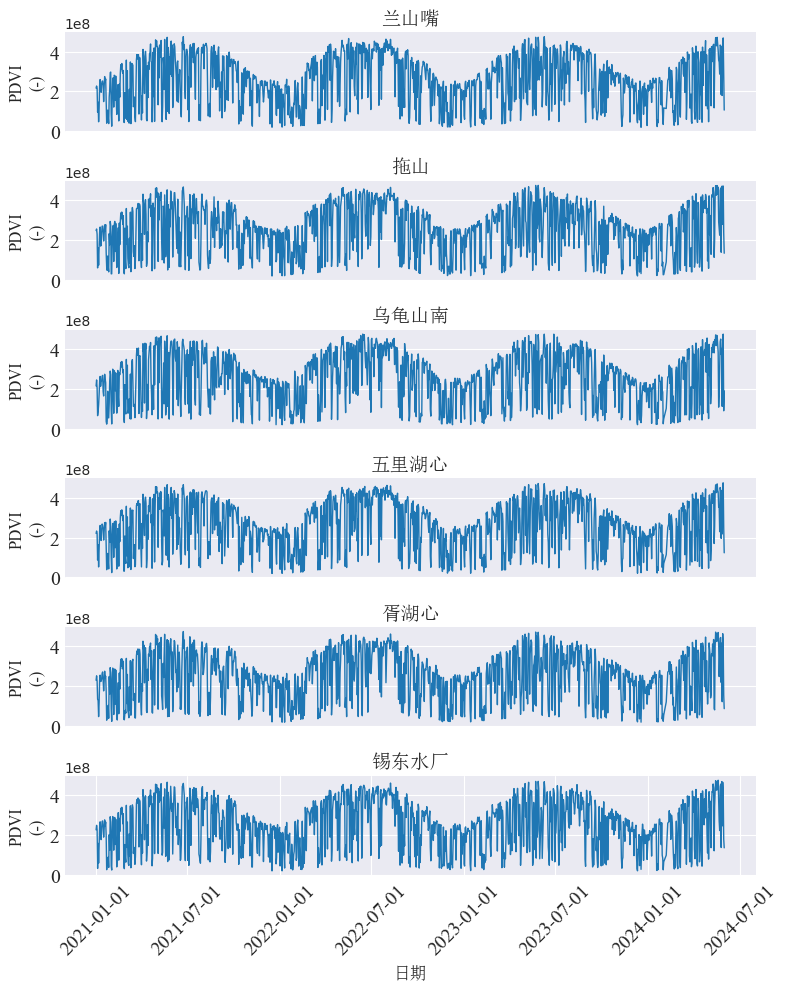

正在绘制: MPAR随时间的变化


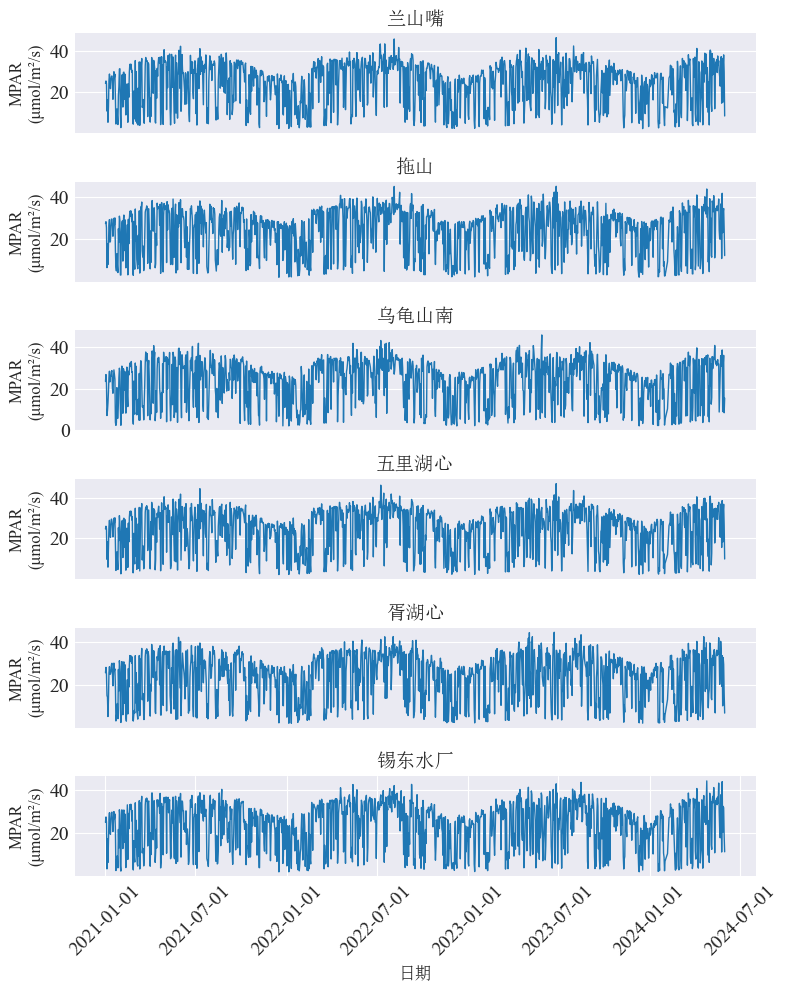

正在绘制: APAR随时间的变化


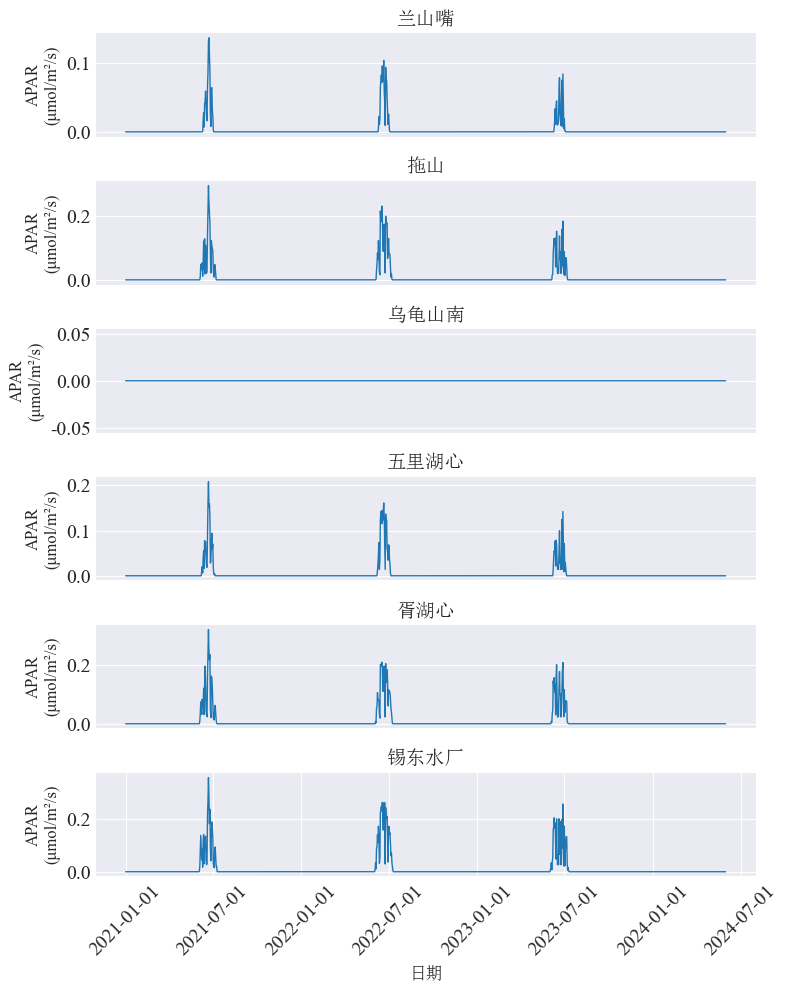

正在绘制: PPDI随时间的变化


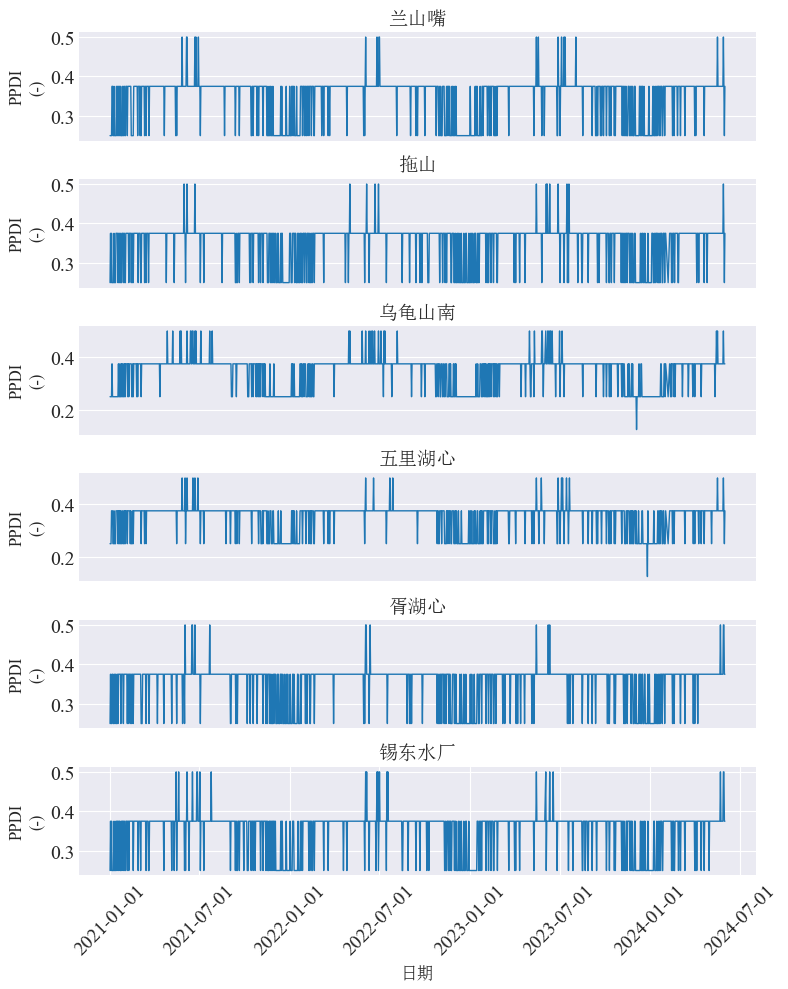

正在绘制: PAI随时间的变化


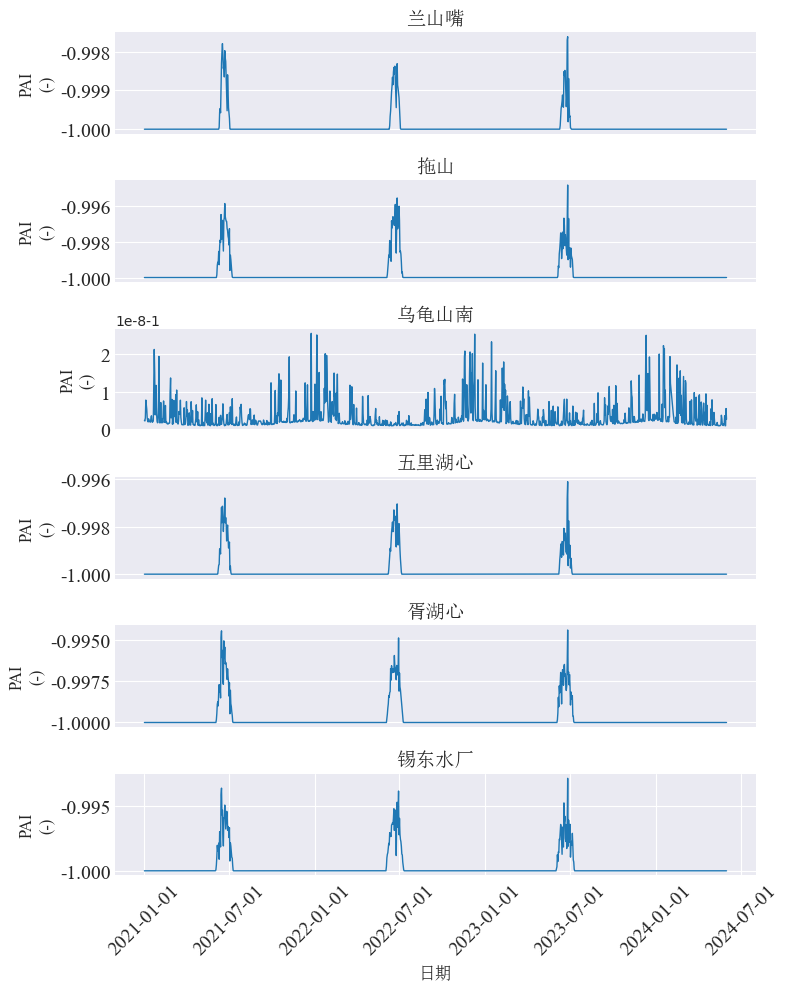

所有特征的时间序列图已生成完毕。


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import matplotlib.font_manager as fm
import numpy as np

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimSun', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['Times New Roman']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 分别设置中英文字体
chinese_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/SIMSUN.TTC', size=14)
english_font = fm.FontProperties(fname='/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/TIMES.TTF', size=14)

# 定义站点列表和对应的日期
stations = ["lanshanzui", "tuoshan", "乌龟山南", "五里湖心", "胥湖心", "锡东水厂"]
file_dates = ["20241027", "20241104", "20241122", "20241125", "20241123", "20241124"]

# 英文站点名转中文字典
station_name_map = {
    'lanshanzui': '兰山嘴',
    'tuoshan': '拖山'
}

# 读取所有站点的数据
dfs = {}
for station, file_date in zip(stations, file_dates):
    filename = f'003-MCD18C2_061_{file_date}_插值填充_{station}.csv'
    
    try:
        df = pd.read_csv(filename)
        df['date'] = pd.to_datetime(df['date'])
        dfs[station] = df
        print(f"成功读取{station}的CSV文件")
    except FileNotFoundError:
        print(f"未找到{station}的CSV文件，请检查文件名和路径是否正确")
        raise

# 定义固定的PAR变量和光合指数顺序
fixed_par_vars = ['GMT_0000_PAR', 'GMT_0300_PAR', 'GMT_0600_PAR', 'GMT_0900_PAR', 
                  'GMT_1200_PAR', 'GMT_1500_PAR', 'GMT_1800_PAR', 'GMT_2100_PAR']
fixed_photo_vars = ['DAPAR', 'PDVI', 'MPAR', 'APAR', 'PPDI', 'PAI']
# 定义需要绘制的特征
features = fixed_par_vars + fixed_photo_vars

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')

# 特征单位映射字典
feature_units = {
    'GMT_0000_PAR': '(μmol/m²/s)',
    'GMT_0300_PAR': '(μmol/m²/s)',
    'GMT_0600_PAR': '(μmol/m²/s)',
    'GMT_0900_PAR': '(μmol/m²/s)',
    'GMT_1200_PAR': '(μmol/m²/s)',
    'GMT_1500_PAR': '(μmol/m²/s)',
    'GMT_1800_PAR': '(μmol/m²/s)',
    'GMT_2100_PAR': '(μmol/m²/s)',
    'DAPAR': '(μmol/m²/s)',
    'PDVI': '(-)',
    'MPAR': '(μmol/m²/s)',
    'APAR': '(μmol/m²/s)',
    'PPDI': '(-)',
    'PAI': '(-)'
}

# 为每个特征创建单独的图表
for feature in features:
    fig, axes = plt.subplots(6, 1, figsize=(8,10))
    print(f'正在绘制: {feature}随时间的变化')
    
    # 使用单一颜色 - 深蓝色
    line_color = '#1f77b4'
    
    for idx, (station, df) in enumerate(dfs.items()):
        ax = axes[idx]
        ax.plot(df['date'], df[feature], linewidth=1, color=line_color)
        
        # 获取显示用的站点名
        display_name = station_name_map.get(station, station)
        
        unit = feature_units.get(feature, '')
        ax.set_title(f'{display_name}', fontproperties=chinese_font, fontsize=14)
        
        # 只在最后一个subplot显示x轴标签和刻度
        if idx < 5:
            ax.set_xticks([])  # 删除x轴刻度
            ax.set_xlabel('')  # 删除x轴标签
        else:
            ax.set_xlabel('日期', fontproperties=chinese_font, fontsize=12)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            ax.tick_params(axis='x', rotation=45)
            
        ax.set_ylabel(f'{feature}\n{unit}', fontproperties=english_font, fontsize=12)
        
        # 设置刻度标签字体
        ax.tick_params(axis='both', which='major', labelsize=10)
        for label in ax.get_yticklabels():  # 只设置y轴标签字体
            label.set_fontproperties(english_font)
        
        if idx == 5:  # 为最后一个subplot设置x轴标签字体
            for label in ax.get_xticklabels():
                label.set_fontproperties(english_font)
    
    plt.tight_layout()
    plt.show()

print("所有特征的时间序列图已生成完毕。")


In [17]:
# 读取乌龟山南站点的数据
station = "乌龟山南"
file_date = "20241122"
filename = f'003-MCD18C2_061_{file_date}_插值填充_{station}.csv'

# 读取CSV文件
df = pd.read_csv(filename)

# 重新计算PAI值
for idx in df.index:
    # 获取当天的PAR值
    par_values = {
        'GMT_0000_PAR': df.loc[idx, 'GMT_0000_PAR'],
        'GMT_0300_PAR': df.loc[idx, 'GMT_0300_PAR'],
        'GMT_0600_PAR': df.loc[idx, 'GMT_0600_PAR'],
        'GMT_0900_PAR': df.loc[idx, 'GMT_0900_PAR'],
        'GMT_1200_PAR': df.loc[idx, 'GMT_1200_PAR'],
        'GMT_1500_PAR': df.loc[idx, 'GMT_1500_PAR'],
        'GMT_1800_PAR': df.loc[idx, 'GMT_1800_PAR'],
        'GMT_2100_PAR': df.loc[idx, 'GMT_2100_PAR']
    }
    
    # 计算上午和下午的PAR总和
    morning_par = [par_values['GMT_0000_PAR'], par_values['GMT_0300_PAR'], 
                  par_values['GMT_0600_PAR'], par_values['GMT_0900_PAR']]
    afternoon_par = [par_values['GMT_1200_PAR'], par_values['GMT_1500_PAR'],
                    par_values['GMT_1800_PAR'], par_values['GMT_2100_PAR']]
    
    morning_sum = sum(morning_par)
    afternoon_sum = sum(afternoon_par)
    
    # 计算新的PAI值
    pai = (afternoon_sum - morning_sum) / (afternoon_sum + morning_sum + 1e-6)
    
    # 更新DataFrame中的PAI值
    df.loc[idx, 'PAI'] = pai

filename1 = f'003-MCD18C2_061_{file_date}_插值填充1_{station}.csv'
filename2 = f'003-MCD18C2_061_{file_date}_插值填充_{station}.csv'

# 将更新后的数据保存回CSV文件
df.to_csv(filename1, index=False)
print(f"已完成{station}站点PAI值的重新计算并保存")


已完成乌龟山南站点PAI值的重新计算并保存


# PAI (Photosynthetically Active radiation Index) 是光合有效辐射不对称指数
# 它反映了一天中上午和下午光合有效辐射的不对称性
# PAI = (下午PAR总和 - 上午PAR总和)/(下午PAR总和 + 上午PAR总和)
# PAI值接近-1表示上午光照强,下午光照弱
# PAI值接近1表示上午光照弱,下午光照强
# PAI值接近0表示上午下午光照较为均衡


/tmp/ipykernel_5161/873086164.py:26: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5161/873086164.py:26: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5161/873086164.py:26: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5161/873086164.py:26: UserWarning: Glyph 20044 (\N{CJK UNIFIED IDEOGRAPH-4E4C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5161/873086164.py:26: UserWarning: Glyph 40863 (\N{CJK UNIFIED IDEOGRAPH-9F9F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5161/873086164.py:26: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5161/873086164.py:26: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.
  plt.tight_layout()

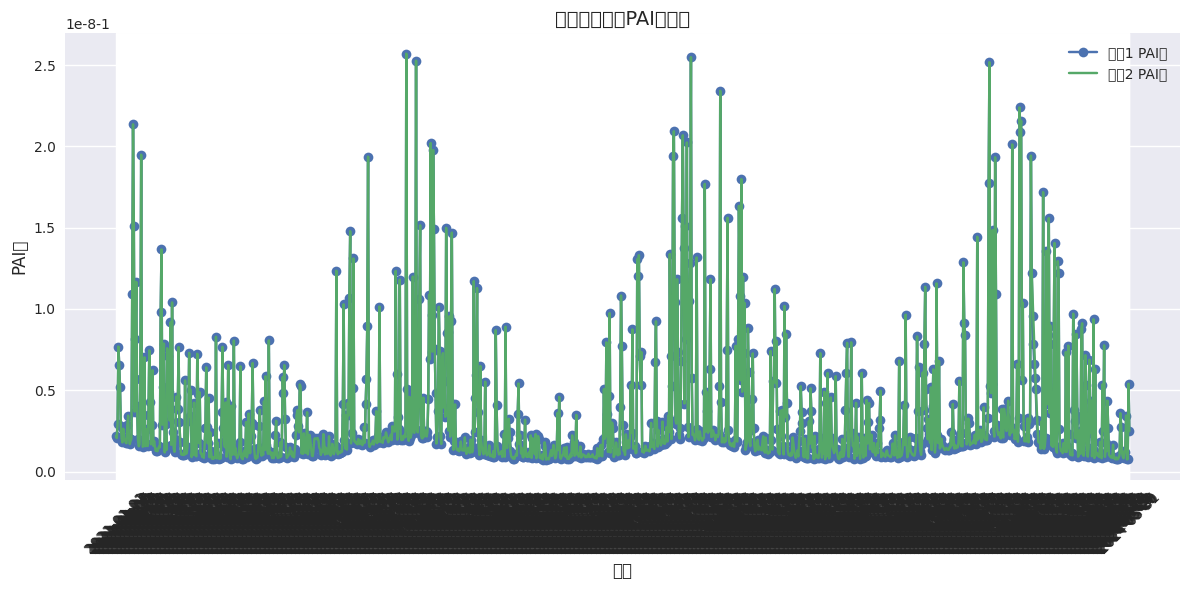

PAI值最大差异: 0.0000000015
PAI值平均差异: 0.0000000000


In [18]:
filename1 = f'003-MCD18C2_061_{file_date}_插值填充1_{station}.csv'
filename2 = f'003-MCD18C2_061_{file_date}_插值填充_{station}.csv'

# 读取两个文件的数据
df1 = pd.read_csv(filename1)
df2 = pd.read_csv(filename2)

# 创建图形
plt.figure(figsize=(12, 6))

# 绘制两个文件的PAI值对比
plt.plot(df1['date'], df1['PAI'], label='文件1 PAI值', marker='o')
plt.plot(df2['date'], df2['PAI'], label='文件2 PAI值', marker='x')

# 设置图形属性
plt.title(f'{station}站点PAI值对比', fontsize=14)
plt.xlabel('日期', fontsize=12)
plt.ylabel('PAI值', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# 旋转x轴日期标签以防重叠
plt.xticks(rotation=45)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 计算两个文件PAI值的差异
pai_diff = abs(df1['PAI'] - df2['PAI'])
print(f"PAI值最大差异: {pai_diff.max():.10f}")
print(f"PAI值平均差异: {pai_diff.mean():.10f}")
